Optimal number of containers for dataset_1: -20800780590921924285068893531144192.00
Optimal number of containers for dataset_2: -18691054496506517481567217839505408.00
Optimal number of containers for dataset_3: -7823075558091297689238854034259968.00
Optimal number of containers for dataset_4: -8455458564662551815373082033389568.00
Optimal number of containers for dataset_5: -19391504301975424081069204526071808.00


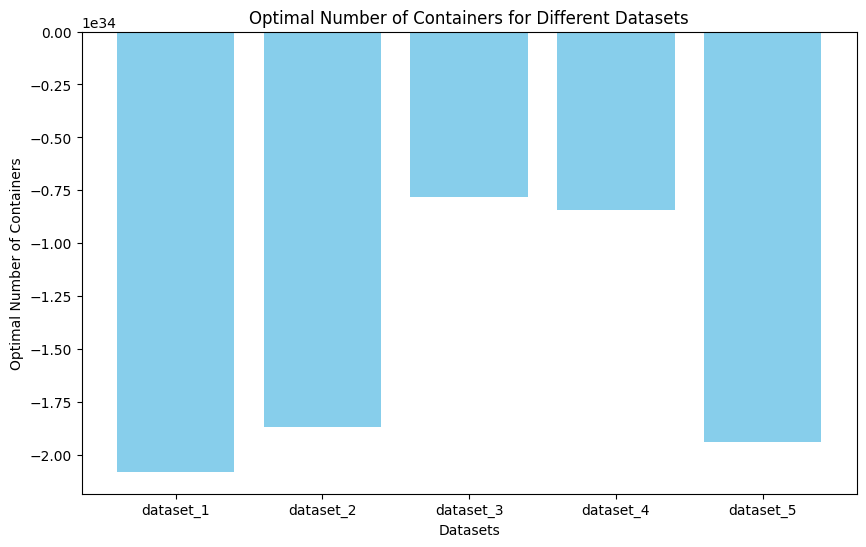

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Example datasets for different combinations of workload and latency
datasets = {
    'dataset_1': {'workload': [10, 20, 30, 40, 50], 'latency': [100, 200, 300, 450, 600]},
    'dataset_2': {'workload': [15, 25, 35, 45, 55], 'latency': [120, 220, 340, 470, 610]},
    'dataset_3': {'workload': [5, 15, 25, 35, 45], 'latency': [80, 160, 240, 380, 520]},
    'dataset_4': {'workload': [12, 22, 32, 42, 52], 'latency': [110, 210, 310, 460, 610]},
    'dataset_5': {'workload': [8, 18, 28, 38, 48], 'latency': [90, 180, 270, 420, 570]},
}

def profile_latency(workload, latency):
    X = np.array(workload).reshape(-1, 1)
    y = np.array(latency)
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    return slope, intercept

def resource_usage(n_containers, workload, slope, intercept):
    return n_containers * (slope * workload + intercept)

def objective(n_containers, workload, slope, intercept):
    return resource_usage(n_containers, workload, slope, intercept)

def constraint(n_containers, workload, slope, intercept):
    latency = slope * workload / n_containers + intercept
    return 500 - latency

# Store results for plotting
results = []

# Iterate over datasets and find optimal containers
for dataset_name, data in datasets.items():
    workload = data['workload']
    latency = data['latency']

    slope, intercept = profile_latency(workload, latency)

    # Example workload for optimization
    test_workload = 100

    # Initial guess
    n_initial = 10

    # Optimization
    result = minimize(objective, n_initial, args=(test_workload, slope, intercept),
                      constraints={'type': 'ineq', 'fun': constraint, 'args': (test_workload, slope, intercept)})

    optimal_containers = result.x[0]

    print(f"Optimal number of containers for {dataset_name}: {optimal_containers:.2f}")
    results.append((dataset_name, optimal_containers))

# Plot the results
dataset_names = [result[0] for result in results]
optimal_values = [result[1] for result in results]

plt.figure(figsize=(10, 6))
plt.bar(dataset_names, optimal_values, color='skyblue')
plt.xlabel('Datasets')
plt.ylabel('Optimal Number of Containers')
plt.title('Optimal Number of Containers for Different Datasets')
plt.show()
